# Model_nodynamics - RNN model of CPRO task using PyTorch without trial dynamics
## Note - this is python 3 code
#### Taku Ito
#### 05/13/2019

In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import os
os.sys.path.append('model/')
import model.model_deep as model
from importlib import reload
model = reload(model)
import model.task as task
task = reload(task)
import time
retrain = True


basedir = '/projects3/SRActFlow/'

# Build training and test batches

In [63]:
model = reload(model)
TrialInfo = model.TrialBatches(NUM_BATCHES=50000,
                               NUM_TASKS_IN_TRAINSET=64,
                               NUM_TASK_TYPES_PER_BATCH=64,
                               NUM_TESTING_TRIAlS_PER_TASK=100,
                               NUM_TRAINING_TRIAlS_PER_TASK=10,
                               NUM_INPUT_ELEMENTS=28,
                               NUM_OUTPUT_ELEMENTS=4,
                               filename=basedir + 'data/results/MODEL/TrialBatches_Default_Deep')
TrialInfo.createAllBatches(nproc=30)

Running batch 0
Running batch 12100
Running batch 9600
Running batch 7100
Running batch 4600
Running batch 2100
Running batch 11700
Running batch 9200
Running batch 4200
Running batch 6700
Running batch 1700
Running batch 8800
Running batch 6300
Running batch 11300
Running batch 3800
Running batch 10900
Running batch 8400
Running batch 5900
Running batch 1300
Running batch 3400
Running batch 10500
Running batch 8000
Running batch 900
Running batch 7600
Running batch 5500
Running batch 5100
Running batch 3000
Running batch 2600
Running batch 500
Running batch 9700
Running batch 100
Running batch 10100
Running batch 7200
Running batch 12200
Running batch 4700
Running batch 4300
Running batch 8900
Running batch 6400
Running batch 2200
Running batch 11800
Running batch 9300
Running batch 1800
Running batch 6800
Running batch 3900
Running batch 8500
Running batch 11000
Running batch 6000
Running batch 11400
Running batch 3500
Running batch 10600
Running batch 8100
Running batch 1400
Running

# Train RNN first on a subset of tasks (half the tasks) using CPU

In [22]:
model = reload(model)
input_batches, output_batches = model.load_training_batches(cuda=False,
                                                            filename=basedir + 'data/results/MODEL/TrialBatches_Default_Deep')
# test_inputs, test_outputs = model.load_testset(cuda=False,
#                                                filename=basedir + 'data/results/MODEL/TrialBatches_Default_NoDynamics')


In [60]:
model = reload(model)
Network = model.RNN(num_rule_inputs=12,
                    num_sensory_inputs=16,
                    hidden_width=64,
                    n_hidden_layers=10,
                    num_motor_decision_outputs=4,
                    learning_rate=0.0001,
                    thresh=0.9)
# Network.cuda = True
Network = Network.cpu()



/home/tito/miniconda3/lib/python3.7/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


In [61]:
model = reload(model) 
timestart = time.time()
model.batch_training(Network, input_batches,output_batches,cuda=False)  
timeend = time.time()
print('Time elapsed using CPU:', timeend-timestart)

Iteration: 0
	loss: 0.25200727581977844
Time elapsed... 0.05989718437194824
	Accuracy:  0.0 %
Iteration: 5000
	loss: 0.0817551463842392
Time elapsed... 23.916416883468628
	Accuracy:  28.4375 %
Iteration: 10000
	loss: 0.01953374594449997
Time elapsed... 24.6408052444458
	Accuracy:  84.375 %
Iteration: 15000
	loss: 0.013530383817851543
Time elapsed... 27.232434272766113
	Accuracy:  93.75 %
Iteration: 20000
	loss: 0.013304673135280609
Time elapsed... 26.569214820861816
	Accuracy:  94.6875 %
Iteration: 25000
	loss: 0.01172716449946165
Time elapsed... 26.72934651374817
	Accuracy:  95.3125 %
Iteration: 30000
	loss: 0.014095920138061047
Time elapsed... 24.655516624450684
	Accuracy:  94.375 %
Iteration: 35000
	loss: 0.01328240055590868
Time elapsed... 26.238527536392212
	Accuracy:  94.6875 %
Iteration: 40000
	loss: 0.011721258983016014
Time elapsed... 27.735393047332764
	Accuracy:  95.3125 %
Iteration: 45000
	loss: 0.014064595103263855
Time elapsed... 29.067039728164673
	Accuracy:  94.375 %
It

# Test on held-out tasks

In [7]:
# model = reload(model)
# outputs, hidden = model.eval(Network,test_inputs,test_outputs,cuda=False)

# Run representational similarity analysis
#### Activate each input separately, and visualize RDM

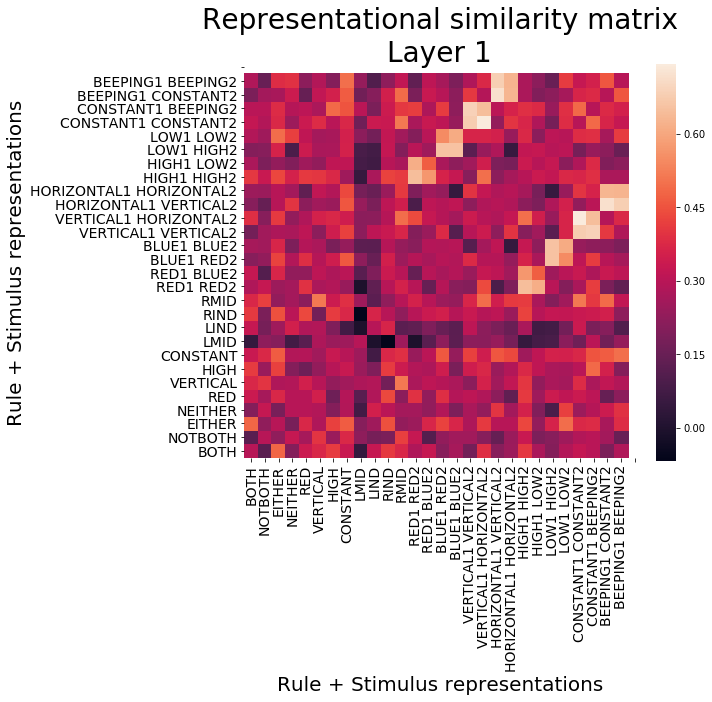

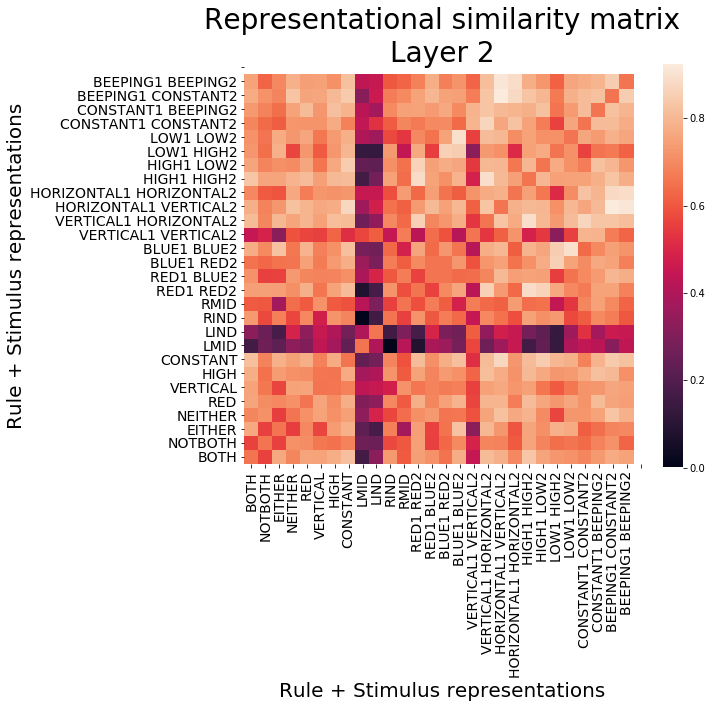

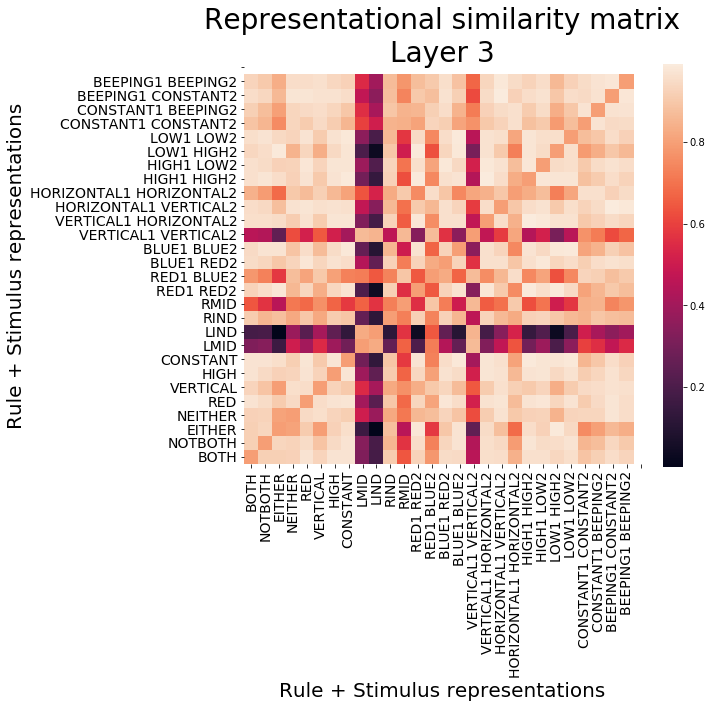

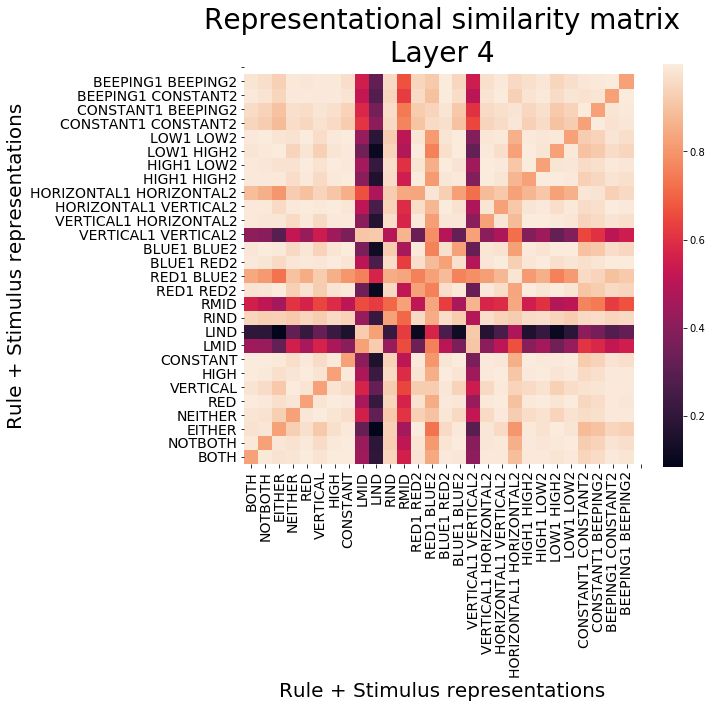

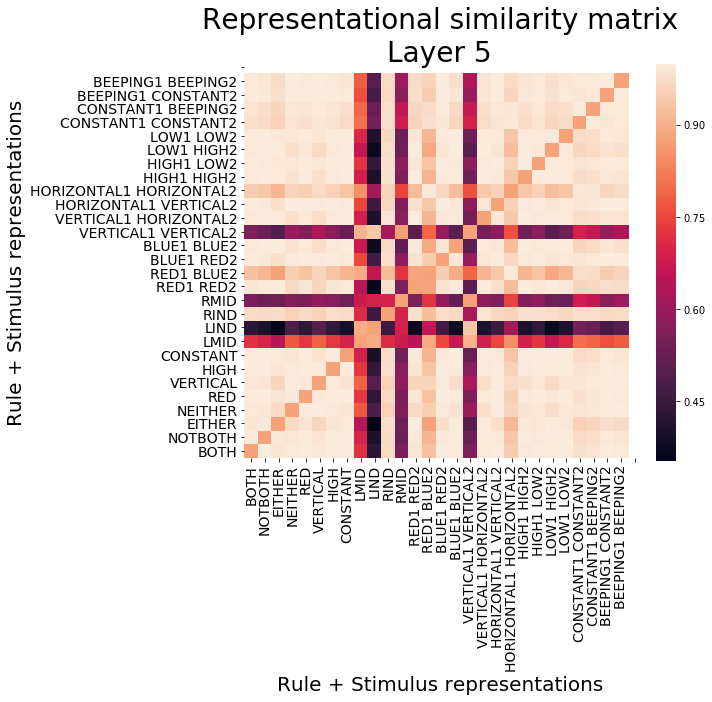

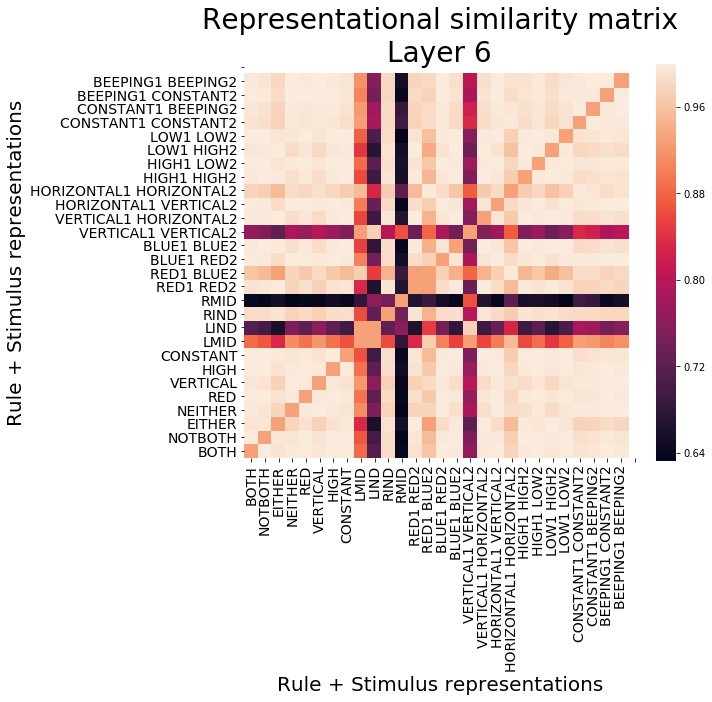

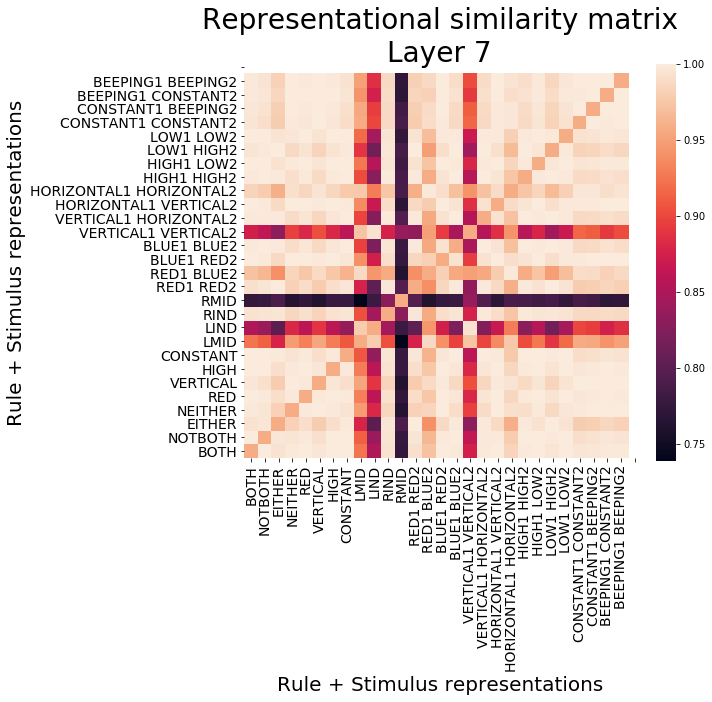

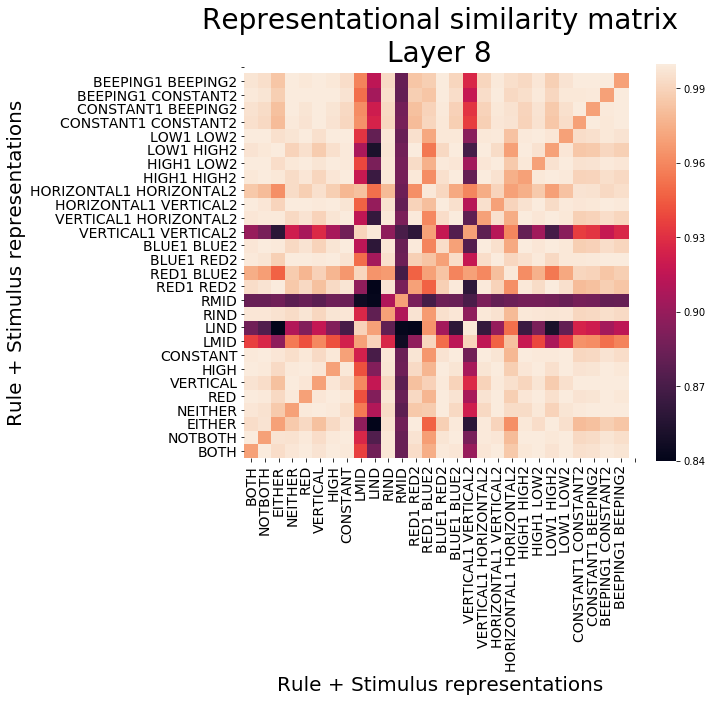

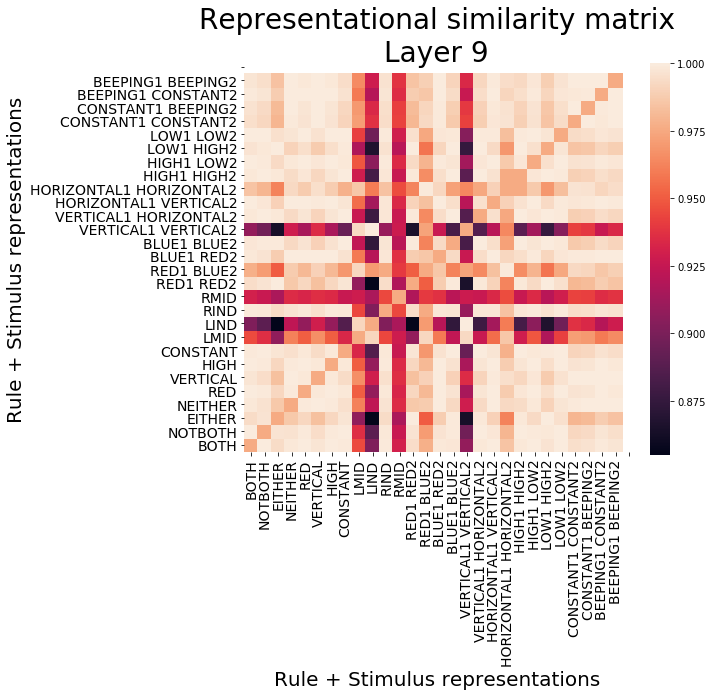

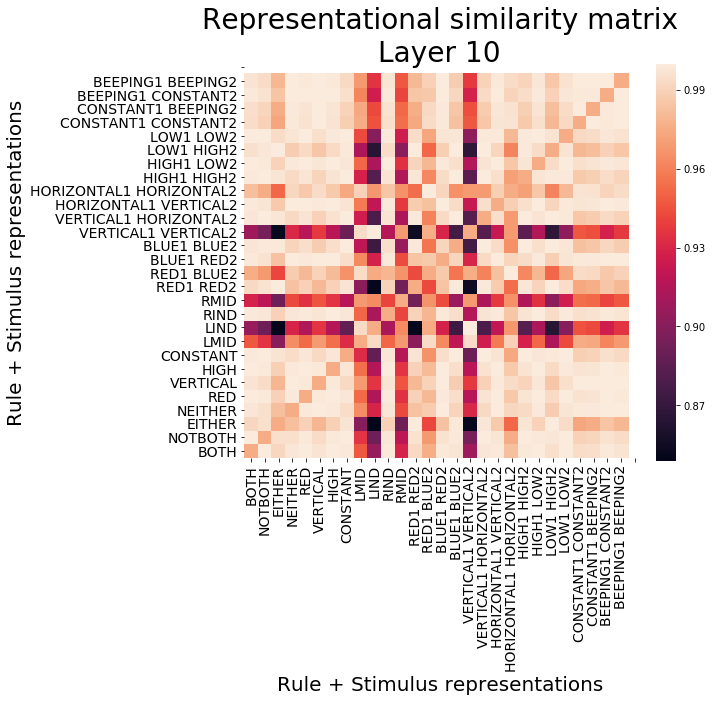

In [52]:
import model.analysis_deep as analysis
analysis = reload(analysis)
rsa_inputs = ['BOTH', 'NOTBOTH', 'EITHER', 'NEITHER', 
              'RED', 'VERTICAL', 'HIGH', 'CONSTANT', 
              'LMID', 'LIND', 'RIND', 'RMID',
              'RED1 RED2', 'RED1 BLUE2', 'BLUE1 RED2', 'BLUE1 BLUE2',
              'VERTICAL1 VERTICAL2','VERTICAL1 HORIZONTAL2', 'HORIZONTAL1 VERTICAL2', 'HORIZONTAL1 HORIZONTAL2',
              'HIGH1 HIGH2', 'HIGH1 LOW2', 'LOW1 HIGH2', 'LOW1 LOW2',
              'CONSTANT1 CONSTANT2', 'CONSTANT1 BEEPING2', 'BEEPING1 CONSTANT2', 'BEEPING1 BEEPING2']
hidden, rsm = analysis.rsa(Network,savepdf=False,show=False)
triu_ind = np.triu_indices(rsm[0].shape[0],k=1)
# hidden = hidden.detach().numpy()
n_layers = Network.n_hidden_layers
for layer in range(n_layers):
    
    plt.figure(figsize=(10,10))
    plt.title('Representational similarity matrix\nLayer ' + str(layer+1),fontsize=28)
#     ax = sns.heatmap(rsm[layer],square=True,center=0, cmap='bwr', cbar=True,cbar_kws={'fraction':0.046})
    mean_corr = np.mean(rsm[layer][triu_ind])
    np.savetxt('RSM_Layer' + str(layer+1) + '.csv',rsm[layer],delimiter=',')
    np.fill_diagonal(rsm[layer],mean_corr)
    ax = sns.heatmap(rsm[layer],square=True, cbar=True,cbar_kws={'fraction':0.046})
    plt.xlabel('Rule + Stimulus representations',fontsize=20)
    plt.ylabel('Rule + Stimulus representations',fontsize=20)
    plt.xticks(np.arange(0.5, len(rsa_inputs)+1), rsa_inputs, rotation=90,fontsize=14)
    plt.yticks(np.arange(0.5, len(rsa_inputs)+1), rsa_inputs, rotation=0, fontsize=14)
    plt.tight_layout()
    ax.invert_yaxis()
#     if savepdf:
#         plt.savefig('ANN_RSM.pdf')

# Save out RSM
# np.savetxt(basedir + 'data/results/MODEL/ANN1280_HiddenLayerRSM_NoDynamics.csv',rsm)